# Data Analysis

## Data Preparation + Cleaning

### Loading and Viewing Data

In [2509]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
import io
import json
import seaborn as sns
from scipy.stats import f_oneway  
import warnings
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler 

warnings.filterwarnings('ignore')

In [2510]:
# load in the dataset
dataset = pd.read_csv('../data/survey_responses.csv')
raw_dataset = dataset.copy()
# view the head of the dataset
dataset.head()

,Year_of_study,Field_of_study,Ever_used_platform,Time_investing,Main_platform_type,Confidence_in_terms,Purchasing_power_q,Single_stock_risk_q,Inflation_time_value_q,Knowledge_improved,Confidence_interpreting_data,Features_used_most,Regretted_misinterpretation,Frequency_based_on_app_data,Greater_influence,Apps_oversimplify,Likely_to_use_new_features,Data_viz_helps
0,2nd year,Engineering/ Science,No,N/A - Not an investor,N/A - Not an investor,Somewhat confident,Not sure,More risky than investing in a diversified fund,£100 today,N/A - Not an investor,Somewhat confident,Market news,No,Rarely,Personal decisions,Agree,Very unlikely,Strongly agree
1,1st year,Business / Economics,Yes,Less than 6 months,Trading app,Somewhat confident,It stays the same,More risky than investing in a diversified fund,£100 today,No,Not confident,Portfolio analytics,Not sure,Sometimes,Personal decisions,Strongly agree,Unlikely,Agree
2,1st year,Business / Economics,Yes,6-12 months,Trading app,Somewhat confident,It decreases,As risky,£100 today,Significantly,Not confident,Stock performance charts,No,Sometimes,Social media trends,Strongly agree,Neutral,Strongly agree
3,1st year,Humanities / Arts,Yes,Over 2 years,Trading app,Very confident,It stays the same,More risky than investing in a diversified fund,£100 today,Significantly,Not confident,Market news,Yes,Sometimes,Personal decisions,Disagree,Neutral,Neutral
4,1st year,Engineering/ Science,Yes,Over 2 years,Robo-advisor,Somewhat confident,Not sure,Not sure,£100 today,Significantly,Not confident,AI or data insights,No,Sometimes,Personal decisions,Agree,Unlikely,Strongly agree


In [2511]:
# dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Year_of_study                 1000 non-null   object
 1   Field_of_study                1000 non-null   object
 2   Ever_used_platform            1000 non-null   object
 3   Time_investing                1000 non-null   object
 4   Main_platform_type            1000 non-null   object
 5   Confidence_in_terms           1000 non-null   object
 6   Purchasing_power_q            1000 non-null   object
 7   Single_stock_risk_q           1000 non-null   object
 8   Inflation_time_value_q        1000 non-null   object
 9   Knowledge_improved            1000 non-null   object
 10  Confidence_interpreting_data  1000 non-null   object
 11  Features_used_most            1000 non-null   object
 12  Regretted_misinterpretation   1000 non-null   object
 13  Frequency_based_on_

In [2512]:
# dataset description + summary stats
dataset.describe()

,Year_of_study,Field_of_study,Ever_used_platform,Time_investing,Main_platform_type,Confidence_in_terms,Purchasing_power_q,Single_stock_risk_q,Inflation_time_value_q,Knowledge_improved,Confidence_interpreting_data,Features_used_most,Regretted_misinterpretation,Frequency_based_on_app_data,Greater_influence,Apps_oversimplify,Likely_to_use_new_features,Data_viz_helps
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,4,2,5,4,4,4,4,4,5,4,5,3,5,4,5,5,5
top,2nd year,Business / Economics,Yes,N/A - Not an investor,N/A - Not an investor,Somewhat confident,It decreases,More risky than investing in a diversified fund,£110 in one year,N/A - Not an investor,Confident,Stock performance charts,No,Sometimes,Data and analytics,Agree,Very likely,Strongly agree
freq,293,357,589,411,411,450,502,490,498,411,301,320,675,295,402,348,255,306


In [2513]:
# look at unique responses to each column and the count of them
for column_name in dataset.columns:
    print(dataset[column_name].unique())
    print(dataset[column_name].value_counts())
    print("")

['2nd year' '1st year' 'Postgraduate' '3rd year']
Year_of_study
2nd year        293
3rd year        285
Postgraduate    212
1st year        210
Name: count, dtype: int64

['Engineering/ Science' 'Business / Economics' 'Humanities / Arts' 'Other']
Field_of_study
Business / Economics    357
Humanities / Arts       251
Engineering/ Science    241
Other                   151
Name: count, dtype: int64

['No' 'Yes']
Ever_used_platform
Yes    589
No     411
Name: count, dtype: int64

['N/A - Not an investor' 'Less than 6 months' '6-12 months' 'Over 2 years'
 '1-2 years']
Time_investing
N/A - Not an investor    411
6-12 months              192
Less than 6 months       162
1-2 years                144
Over 2 years              91
Name: count, dtype: int64

['N/A - Not an investor' 'Trading app' 'Robo-advisor' 'Other']
Main_platform_type
N/A - Not an investor    411
Trading app              398
Robo-advisor             153
Other                     38
Name: count, dtype: int64

['Somewhat confid

### Clean Section 1 - Background

In [2514]:
# Clean Q1
study_map = {
    '1st year': 1,
    '2nd year': 2,
    '3rd year': 3,
    'Postgraduate': 4 
}

dataset['Year_of_study'] = dataset['Year_of_study'].map(study_map)

In [2515]:
dataset.head()

,Year_of_study,Field_of_study,Ever_used_platform,Time_investing,Main_platform_type,Confidence_in_terms,Purchasing_power_q,Single_stock_risk_q,Inflation_time_value_q,Knowledge_improved,Confidence_interpreting_data,Features_used_most,Regretted_misinterpretation,Frequency_based_on_app_data,Greater_influence,Apps_oversimplify,Likely_to_use_new_features,Data_viz_helps
0,2,Engineering/ Science,No,N/A - Not an investor,N/A - Not an investor,Somewhat confident,Not sure,More risky than investing in a diversified fund,£100 today,N/A - Not an investor,Somewhat confident,Market news,No,Rarely,Personal decisions,Agree,Very unlikely,Strongly agree
1,1,Business / Economics,Yes,Less than 6 months,Trading app,Somewhat confident,It stays the same,More risky than investing in a diversified fund,£100 today,No,Not confident,Portfolio analytics,Not sure,Sometimes,Personal decisions,Strongly agree,Unlikely,Agree
2,1,Business / Economics,Yes,6-12 months,Trading app,Somewhat confident,It decreases,As risky,£100 today,Significantly,Not confident,Stock performance charts,No,Sometimes,Social media trends,Strongly agree,Neutral,Strongly agree
3,1,Humanities / Arts,Yes,Over 2 years,Trading app,Very confident,It stays the same,More risky than investing in a diversified fund,£100 today,Significantly,Not confident,Market news,Yes,Sometimes,Personal decisions,Disagree,Neutral,Neutral
4,1,Engineering/ Science,Yes,Over 2 years,Robo-advisor,Somewhat confident,Not sure,Not sure,£100 today,Significantly,Not confident,AI or data insights,No,Sometimes,Personal decisions,Agree,Unlikely,Strongly agree


In [2516]:
# Q2 - Field of Study
dataset = pd.get_dummies(
    dataset, 
    columns=['Field_of_study'],
    prefix='Field_of_study'
)

In [2517]:
dataset.head()

,Year_of_study,Ever_used_platform,Time_investing,Main_platform_type,Confidence_in_terms,Purchasing_power_q,Single_stock_risk_q,Inflation_time_value_q,Knowledge_improved,Confidence_interpreting_data,...,Regretted_misinterpretation,Frequency_based_on_app_data,Greater_influence,Apps_oversimplify,Likely_to_use_new_features,Data_viz_helps,Field_of_study_Business / Economics,Field_of_study_Engineering/ Science,Field_of_study_Humanities / Arts,Field_of_study_Other
0,2,No,N/A - Not an investor,N/A - Not an investor,Somewhat confident,Not sure,More risky than investing in a diversified fund,£100 today,N/A - Not an investor,Somewhat confident,...,No,Rarely,Personal decisions,Agree,Very unlikely,Strongly agree,False,True,False,False
1,1,Yes,Less than 6 months,Trading app,Somewhat confident,It stays the same,More risky than investing in a diversified fund,£100 today,No,Not confident,...,Not sure,Sometimes,Personal decisions,Strongly agree,Unlikely,Agree,True,False,False,False
2,1,Yes,6-12 months,Trading app,Somewhat confident,It decreases,As risky,£100 today,Significantly,Not confident,...,No,Sometimes,Social media trends,Strongly agree,Neutral,Strongly agree,True,False,False,False
3,1,Yes,Over 2 years,Trading app,Very confident,It stays the same,More risky than investing in a diversified fund,£100 today,Significantly,Not confident,...,Yes,Sometimes,Personal decisions,Disagree,Neutral,Neutral,False,False,True,False
4,1,Yes,Over 2 years,Robo-advisor,Somewhat confident,Not sure,Not sure,£100 today,Significantly,Not confident,...,No,Sometimes,Personal decisions,Agree,Unlikely,Strongly agree,False,True,False,False


In [2518]:
# Clean Q3 - Platform
use_platform_map = {
    'No': 0,
    'Yes': 1
}
dataset['Ever_used_platform'] = dataset['Ever_used_platform'].map(use_platform_map)

In [2519]:
# Clean Q4 - Time investing

dataset = pd.get_dummies(
    dataset, 
    columns=['Time_investing'],
    prefix='Time_investing'
)

In [2520]:
# Clean Q5 - main platform used
dataset = pd.get_dummies(
    dataset, 
    columns=['Main_platform_type'],
    prefix='Main_platform_type'
)

In [2521]:
dataset.head()

,Year_of_study,Ever_used_platform,Confidence_in_terms,Purchasing_power_q,Single_stock_risk_q,Inflation_time_value_q,Knowledge_improved,Confidence_interpreting_data,Features_used_most,Regretted_misinterpretation,...,Field_of_study_Other,Time_investing_1-2 years,Time_investing_6-12 months,Time_investing_Less than 6 months,Time_investing_N/A - Not an investor,Time_investing_Over 2 years,Main_platform_type_N/A - Not an investor,Main_platform_type_Other,Main_platform_type_Robo-advisor,Main_platform_type_Trading app
0,2,0,Somewhat confident,Not sure,More risky than investing in a diversified fund,£100 today,N/A - Not an investor,Somewhat confident,Market news,No,...,False,False,False,False,True,False,True,False,False,False
1,1,1,Somewhat confident,It stays the same,More risky than investing in a diversified fund,£100 today,No,Not confident,Portfolio analytics,Not sure,...,False,False,False,True,False,False,False,False,False,True
2,1,1,Somewhat confident,It decreases,As risky,£100 today,Significantly,Not confident,Stock performance charts,No,...,False,False,True,False,False,False,False,False,False,True
3,1,1,Very confident,It stays the same,More risky than investing in a diversified fund,£100 today,Significantly,Not confident,Market news,Yes,...,False,False,False,False,False,True,False,False,False,True
4,1,1,Somewhat confident,Not sure,Not sure,£100 today,Significantly,Not confident,AI or data insights,No,...,False,False,False,False,False,True,False,False,True,False


### Clean Section 2 - Financial Literacy

In [2522]:
# define if they got they answer correct
columns_with_correct_answers = ['Purchasing_power_q', 
                                'Single_stock_risk_q', 
                                'Inflation_time_value_q']

correct_answers = ['It decreases',
                    'More risky than investing in a diversified fund',
                    '£110 in one year']

for column, correct_answer in zip(columns_with_correct_answers, correct_answers):
        
        dataset[column] = (dataset[column] == correct_answer).astype(int)
        
        print(f"Replaced values in column: '{column}'")

for column_name in columns_with_correct_answers:
    print(dataset[column_name].unique())
    print(dataset[column_name].value_counts())
    print("")

Replaced values in column: 'Purchasing_power_q'
Replaced values in column: 'Single_stock_risk_q'
Replaced values in column: 'Inflation_time_value_q'
[0 1]
Purchasing_power_q
1    502
0    498
Name: count, dtype: int64

[1 0]
Single_stock_risk_q
0    510
1    490
Name: count, dtype: int64

[0 1]
Inflation_time_value_q
0    502
1    498
Name: count, dtype: int64



In [2523]:
columns_to_label_enc = ['Confidence_in_terms',
                        'Knowledge_improved']

confidence_map = {
        'Not confident': 0,
        'Somewhat confident': 1,
        'Confident': 2,
        'Very confident': 3
    }

knowledge_map_ = {
    'N/A - Not an investor': 0,  
    'No': 1,
    'Slightly': 2,
    'Moderately': 3,
    'Significantly': 4
}

dataset['Confidence_in_terms'] = dataset['Confidence_in_terms'].map(confidence_map)
dataset['Knowledge_improved'] = dataset['Knowledge_improved'].map(knowledge_map_)

for column_name in columns_to_label_enc:
    print(dataset[column_name].unique())
    print(dataset[column_name].value_counts())
    print("")

[1 3 0 2]
Confidence_in_terms
1    450
0    230
2    182
3    138
Name: count, dtype: int64

[0 1 4 3 2]
Knowledge_improved
0    411
2    208
3    170
4    122
1     89
Name: count, dtype: int64



In [2524]:
# Calculate a financial literacy score from the survery results
columns_to_sum = ['Purchasing_power_q', 
                  'Single_stock_risk_q', 
                  'Inflation_time_value_q']

# 2. Sum them (axis=1) and assign the result to a new column
dataset['Financial_Literacy_Score'] = dataset[columns_to_sum].sum(axis=1)

In [2525]:
dataset.head()

,Year_of_study,Ever_used_platform,Confidence_in_terms,Purchasing_power_q,Single_stock_risk_q,Inflation_time_value_q,Knowledge_improved,Confidence_interpreting_data,Features_used_most,Regretted_misinterpretation,...,Time_investing_1-2 years,Time_investing_6-12 months,Time_investing_Less than 6 months,Time_investing_N/A - Not an investor,Time_investing_Over 2 years,Main_platform_type_N/A - Not an investor,Main_platform_type_Other,Main_platform_type_Robo-advisor,Main_platform_type_Trading app,Financial_Literacy_Score
0,2,0,1,0,1,0,0,Somewhat confident,Market news,No,...,False,False,False,True,False,True,False,False,False,1
1,1,1,1,0,1,0,1,Not confident,Portfolio analytics,Not sure,...,False,False,True,False,False,False,False,False,True,1
2,1,1,1,1,0,0,4,Not confident,Stock performance charts,No,...,False,True,False,False,False,False,False,False,True,1
3,1,1,3,0,1,0,4,Not confident,Market news,Yes,...,False,False,False,False,True,False,False,False,True,1
4,1,1,1,0,0,0,4,Not confident,AI or data insights,No,...,False,False,False,False,True,False,False,True,False,0


### Clean Section 3 - Digital Literacy

In [2526]:
dataset.head()

,Year_of_study,Ever_used_platform,Confidence_in_terms,Purchasing_power_q,Single_stock_risk_q,Inflation_time_value_q,Knowledge_improved,Confidence_interpreting_data,Features_used_most,Regretted_misinterpretation,...,Time_investing_1-2 years,Time_investing_6-12 months,Time_investing_Less than 6 months,Time_investing_N/A - Not an investor,Time_investing_Over 2 years,Main_platform_type_N/A - Not an investor,Main_platform_type_Other,Main_platform_type_Robo-advisor,Main_platform_type_Trading app,Financial_Literacy_Score
0,2,0,1,0,1,0,0,Somewhat confident,Market news,No,...,False,False,False,True,False,True,False,False,False,1
1,1,1,1,0,1,0,1,Not confident,Portfolio analytics,Not sure,...,False,False,True,False,False,False,False,False,True,1
2,1,1,1,1,0,0,4,Not confident,Stock performance charts,No,...,False,True,False,False,False,False,False,False,True,1
3,1,1,3,0,1,0,4,Not confident,Market news,Yes,...,False,False,False,False,True,False,False,False,True,1
4,1,1,1,0,0,0,4,Not confident,AI or data insights,No,...,False,False,False,False,True,False,False,True,False,0


In [2527]:
# Clean Q11 - confidence in data intepretation
interpreting_data_map = {
    'Not confident': 0,
    'Somewhat confident': 1,
    'Confident': 2, 
    'Very confident': 3
}

dataset['Confidence_interpreting_data'] = dataset['Confidence_interpreting_data'].map(interpreting_data_map)

In [2528]:
# Clean Q12 - which features are most used

dataset = pd.get_dummies(
    dataset, 
    columns=['Features_used_most'],
    prefix='Features_used_most'
)

In [2529]:
# Clean Q13 - regreted decsions 

dataset = pd.get_dummies(
    dataset, 
    columns=['Regretted_misinterpretation'],
    prefix='Regretted_misinterpretation'
)


### Clean Section 4 - Investment Behaviour & Attitudes

In [2530]:
dataset.head()

,Year_of_study,Ever_used_platform,Confidence_in_terms,Purchasing_power_q,Single_stock_risk_q,Inflation_time_value_q,Knowledge_improved,Confidence_interpreting_data,Frequency_based_on_app_data,Greater_influence,...,Main_platform_type_Trading app,Financial_Literacy_Score,Features_used_most_AI or data insights,Features_used_most_Market news,Features_used_most_Other,Features_used_most_Portfolio analytics,Features_used_most_Stock performance charts,Regretted_misinterpretation_No,Regretted_misinterpretation_Not sure,Regretted_misinterpretation_Yes
0,2,0,1,0,1,0,0,1,Rarely,Personal decisions,...,False,1,False,True,False,False,False,True,False,False
1,1,1,1,0,1,0,1,0,Sometimes,Personal decisions,...,True,1,False,False,False,True,False,False,True,False
2,1,1,1,1,0,0,4,0,Sometimes,Social media trends,...,True,1,False,False,False,False,True,True,False,False
3,1,1,3,0,1,0,4,0,Sometimes,Personal decisions,...,True,1,False,True,False,False,False,False,False,True
4,1,1,1,0,0,0,4,0,Sometimes,Personal decisions,...,False,0,True,False,False,False,False,True,False,False


In [2531]:
# Clean Q14
frequency_map = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Often': 3,
    'Always': 4
}
dataset['Frequency_based_on_app_data'] = dataset['Frequency_based_on_app_data'].map(frequency_map)

In [2532]:
# Clean Q15 - influenced by what?

dataset = pd.get_dummies(
    dataset, 
    columns=['Greater_influence'],
    prefix='Greater_influence'
)

In [2533]:
# Clean Q16
oversimplify_map = {
    'Strongly disagree': 0,
    'Disagree': 1,
    'Neutral': 2,
    'Agree': 3,
    'Strongly agree': 4
}
dataset['Apps_oversimplify'] = dataset['Apps_oversimplify'].map(oversimplify_map)


In [2534]:
# Clean Q17
likely_map = {
    'Very unlikely': 0,
    'Unlikely': 1,
    'Neutral': 2,
    'Likely': 3,
    'Very likely': 4
}
dataset['Likely_to_use_new_features'] = dataset['Likely_to_use_new_features'].map(likely_map)


In [2535]:
# Clean Q18
viz_helps_map = {
    'Strongly disagree': 0,
    'Disagree': 1,
    'Neutral': 2,
    'Agree': 3,
    'Strongly agree': 4
}
dataset['Data_viz_helps'] = dataset['Data_viz_helps'].map(viz_helps_map)


In [2536]:
# Create the digital literacy score
columns_for_score = [
        'Confidence_interpreting_data',
        'Data_viz_helps'                
    ]

dataset['Digital_Literacy_Score'] = dataset[columns_for_score].sum(axis=1)

## Data Visualisation

In [2537]:
raw_dataset.head()

,Year_of_study,Field_of_study,Ever_used_platform,Time_investing,Main_platform_type,Confidence_in_terms,Purchasing_power_q,Single_stock_risk_q,Inflation_time_value_q,Knowledge_improved,Confidence_interpreting_data,Features_used_most,Regretted_misinterpretation,Frequency_based_on_app_data,Greater_influence,Apps_oversimplify,Likely_to_use_new_features,Data_viz_helps
0,2nd year,Engineering/ Science,No,N/A - Not an investor,N/A - Not an investor,Somewhat confident,Not sure,More risky than investing in a diversified fund,£100 today,N/A - Not an investor,Somewhat confident,Market news,No,Rarely,Personal decisions,Agree,Very unlikely,Strongly agree
1,1st year,Business / Economics,Yes,Less than 6 months,Trading app,Somewhat confident,It stays the same,More risky than investing in a diversified fund,£100 today,No,Not confident,Portfolio analytics,Not sure,Sometimes,Personal decisions,Strongly agree,Unlikely,Agree
2,1st year,Business / Economics,Yes,6-12 months,Trading app,Somewhat confident,It decreases,As risky,£100 today,Significantly,Not confident,Stock performance charts,No,Sometimes,Social media trends,Strongly agree,Neutral,Strongly agree
3,1st year,Humanities / Arts,Yes,Over 2 years,Trading app,Very confident,It stays the same,More risky than investing in a diversified fund,£100 today,Significantly,Not confident,Market news,Yes,Sometimes,Personal decisions,Disagree,Neutral,Neutral
4,1st year,Engineering/ Science,Yes,Over 2 years,Robo-advisor,Somewhat confident,Not sure,Not sure,£100 today,Significantly,Not confident,AI or data insights,No,Sometimes,Personal decisions,Agree,Unlikely,Strongly agree


In [2538]:
dataset.head()
dataset.to_csv('../data/cleaned_regression_data.csv', index = False)

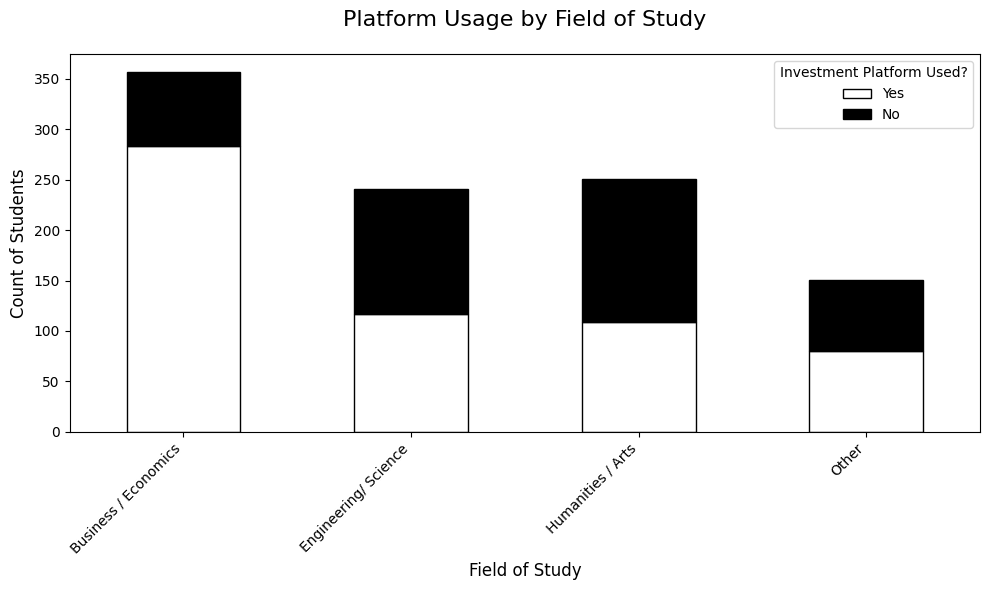

In [2539]:
# Plot 1 
# Create a crosstab to get the counts
cross_tab = pd.crosstab(raw_dataset['Field_of_study'], raw_dataset['Ever_used_platform'])

# make yes below and no on top
if 'Yes' in cross_tab.columns and 'No' in cross_tab.columns:
        cross_tab = cross_tab[['Yes', 'No']]

# Create the plot
ax1 = cross_tab.plot(kind='bar', stacked=True, colormap='Greys', figsize=(10, 6), edgecolor='black') 

ax1.set_title('Platform Usage by Field of Study', fontsize=16, pad=20)
ax1.set_xlabel('Field of Study', fontsize=12)
ax1.set_ylabel('Count of Students', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(title='Investment Platform Used?')

plt.tight_layout() # Adjust plot to prevent label overlap
plt.savefig('../figures/field_vs_platform.png')
plt.show()


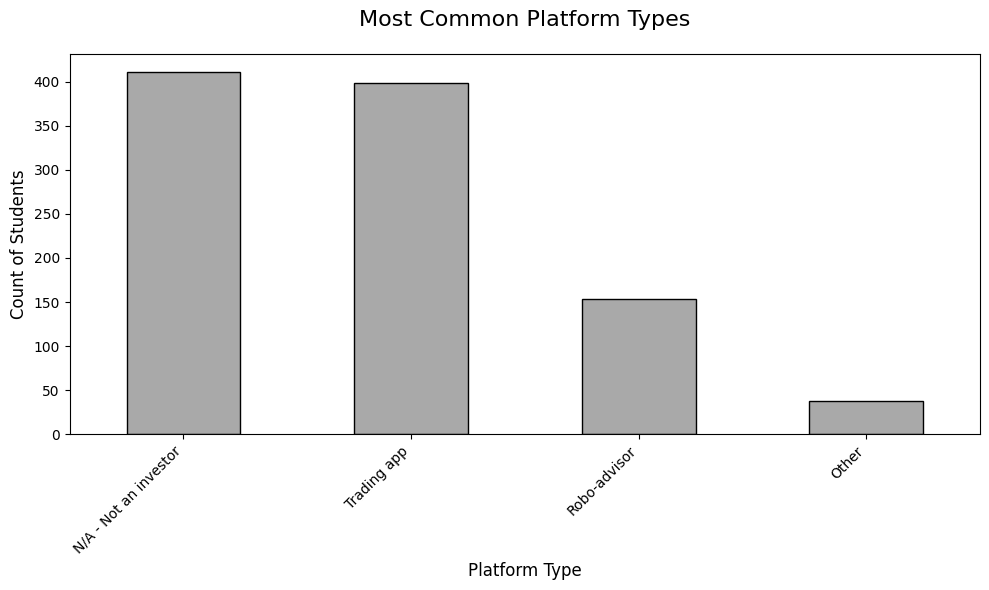

In [2540]:
# Clean whitespace and get value counts, sorted by frequency
platform_counts = raw_dataset['Main_platform_type'].str.strip().value_counts()

ax2 = platform_counts.plot(kind='bar', color='darkgrey', figsize=(10, 6), edgecolor='black')

ax2.set_title('Most Common Platform Types', fontsize=16, pad=20)
ax2.set_xlabel('Platform Type', fontsize=12)
ax2.set_ylabel('Count of Students', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('../figures/platform_type.png')
plt.show()

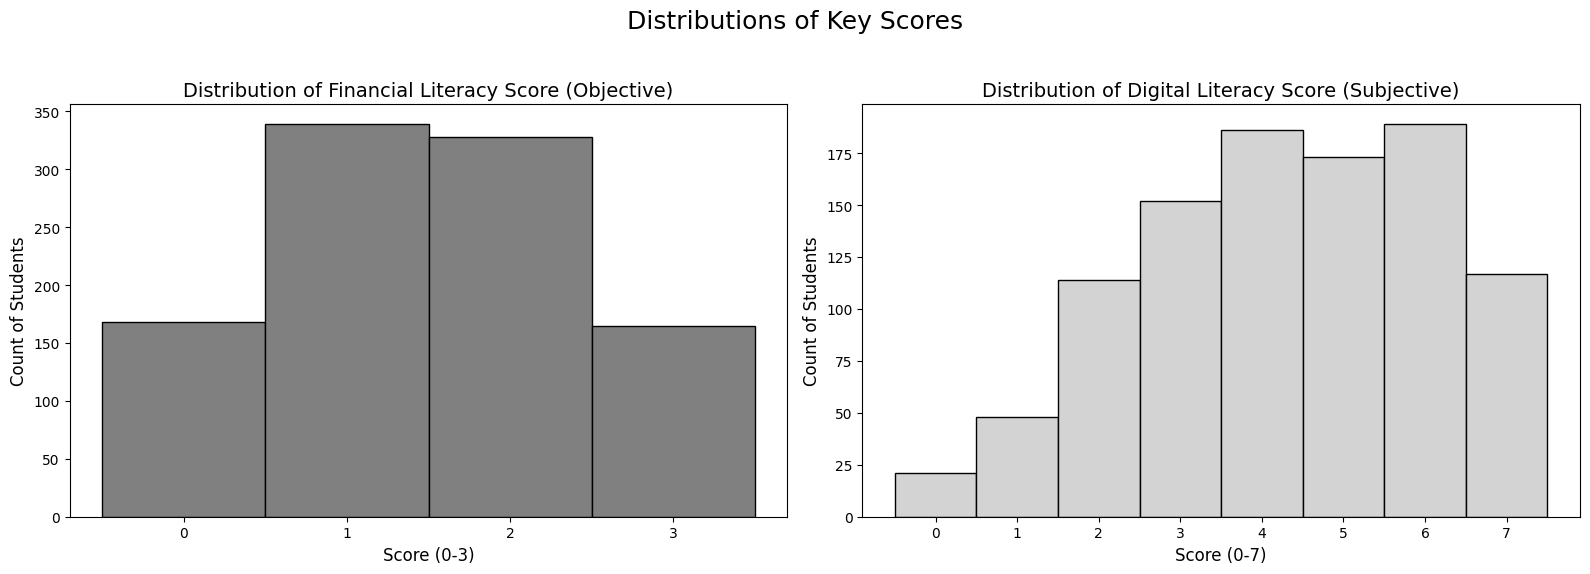

In [2541]:
# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot A: Financial_Literacy_Score (Score 0-3)
# Create bins to ensure we have one bar per integer score
bins_financial = np.arange(dataset['Financial_Literacy_Score'].min(), dataset['Financial_Literacy_Score'].max() + 2)
ax1.hist(dataset['Financial_Literacy_Score'], 
            bins=bins_financial, 
            align='left', 
            color='grey', 
            edgecolor='black')

ax1.set_title('Distribution of Financial Literacy Score (Objective)', fontsize=14)
ax1.set_xlabel('Score (0-3)', fontsize=12)
ax1.set_ylabel('Count of Students', fontsize=12)
ax1.set_xticks([0, 1, 2, 3])

# Plot B: Digital_Literacy_Score (Score 0-7)
# Create bins for each integer score
bins_digital = np.arange(dataset['Digital_Literacy_Score'].min(), dataset['Digital_Literacy_Score'].max() + 2)
ax2.hist(dataset['Digital_Literacy_Score'], 
            bins=bins_digital, 
            align='left', 
            color='lightgrey', 
            edgecolor='black')

ax2.set_title('Distribution of Digital Literacy Score (Subjective)', fontsize=14)
ax2.set_xlabel('Score (0-7)', fontsize=12)
ax2.set_ylabel('Count of Students', fontsize=12)
ax2.set_xticks(range(int(dataset['Digital_Literacy_Score'].min()), int(dataset['Digital_Literacy_Score'].max()) + 1))

# Add an overall title for the figure
fig.suptitle('Distributions of Key Scores', fontsize=18)
fig.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust for suptitle

plt.savefig('../figures/score_histograms.png')
plt.show()


In [2542]:
plot_df = pd.DataFrame({
        'Field_of_study': raw_dataset['Field_of_study'],
        'Time_investing': raw_dataset['Time_investing'],
        'Financial_Literacy_Score': dataset['Financial_Literacy_Score']
    })


--- ANOVA Test Results (Score by Field) ---
F-Statistic: 133.1077
P-Value: 0.0000


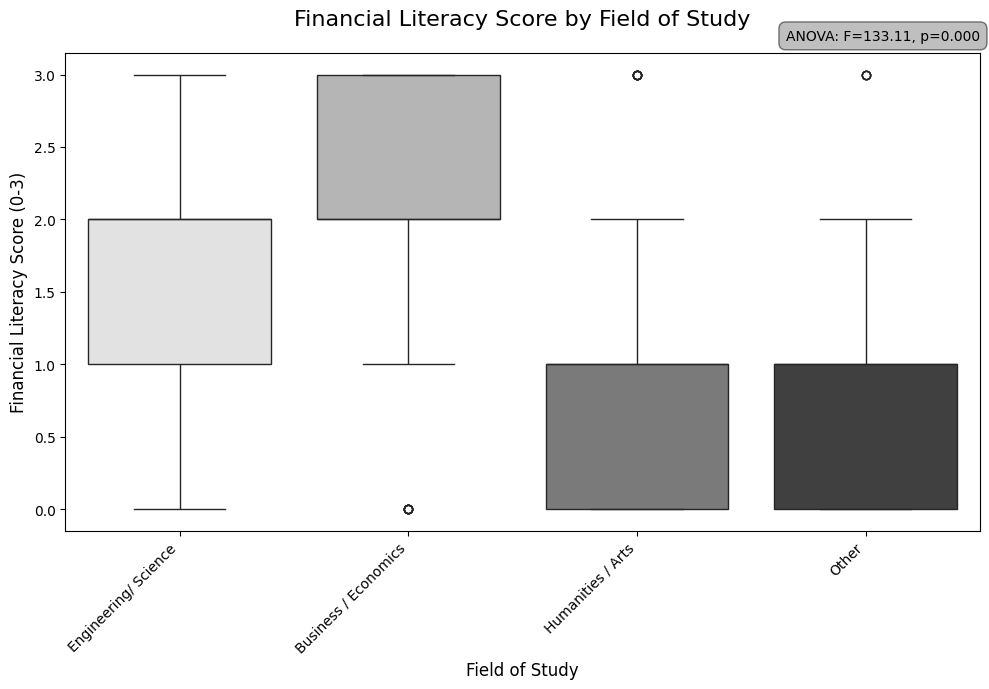

In [2543]:
plt.figure(figsize=(10, 7))
ax1 = sns.boxplot(x='Field_of_study', y='Financial_Literacy_Score', data=plot_df,
                  palette='Greys')

# Set plot titles and labels
ax1.set_title('Financial Literacy Score by Field of Study', fontsize=16, pad=20)
ax1.set_xlabel('Field of Study', fontsize=12)
ax1.set_ylabel('Financial Literacy Score (0-3)', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right') # Rotate x-axis labels

# Paired Statistical Test: ANOVA
# Get unique groups
fields = plot_df['Field_of_study'].unique()

# Prepare data for ANOVA
score_groups = []
for field in fields:
    scores = plot_df['Financial_Literacy_Score'][plot_df['Field_of_study'] == field].dropna()
    if len(scores) > 0:
        score_groups.append(scores)

#  Run the ANOVA
f_stat, p_value = f_oneway(*score_groups)
# Format the results string
anova_text = f"ANOVA: F={f_stat:.2f}, p={p_value:.3f}"
print("\n--- ANOVA Test Results (Score by Field) ---") 
print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Add the text to the plot axes
plt.text(1, 1.05, anova_text,
         transform=ax1.transAxes, # Coordinates relative to axes
         horizontalalignment='right',
         verticalalignment='top',
         fontsize=10,
         bbox=dict(boxstyle='round,pad=0.5', fc='grey', alpha=0.5)) 

# Adjust layout and save
plt.tight_layout()
plt.savefig('../figures/box_field_vs_score_with_anova.png') # New filename
plt.show() # Display the plot


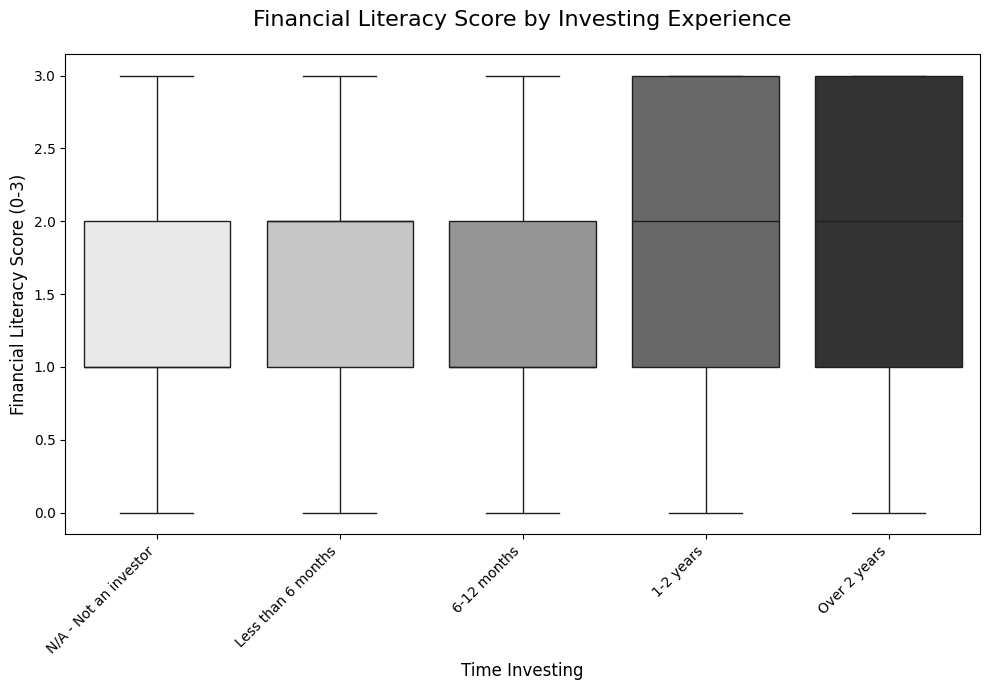

In [2544]:
# Define the logical order for the X-axis
time_order = [
    'N/A - Not an investor',
    'Less than 6 months',
    '6-12 months',
    '1-2 years',
    'Over 2 years'
]

plt.figure(figsize=(10, 7))
ax2 = sns.boxplot(x='Time_investing', y='Financial_Literacy_Score', data=plot_df,
                    palette='Greys', order=time_order)

ax2.set_title('Financial Literacy Score by Investing Experience', fontsize=16, pad=20)
ax2.set_xlabel('Time Investing', fontsize=12)
ax2.set_ylabel('Financial Literacy Score (0-3)', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('../figures/box_time_vs_score.png')
plt.show()

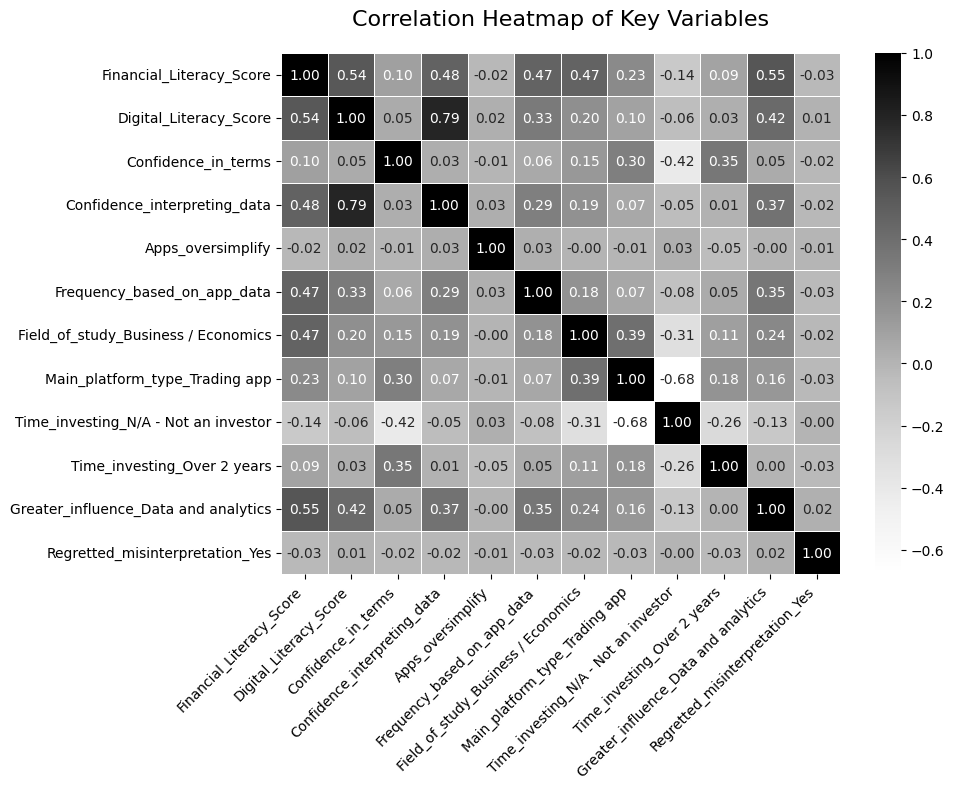

In [2590]:
# Variables to include (You can adjust this list based on your Feature Importance plot)
key_variables = [
    # Key Outcomes / Scores
    'Financial_Literacy_Score',
    'Digital_Literacy_Score', 
    
    # Core Ordinal Variables / Attitudes
    'Confidence_in_terms',           # Subjective financial literacy
    'Confidence_interpreting_data',  # Subjective digital literacy
    'Apps_oversimplify',
    'Frequency_based_on_app_data',
    
    # Key OHE Categories (Updated to include both extremes of Time Investing)
    'Field_of_study_Business / Economics', 
    'Main_platform_type_Trading app', 
    'Time_investing_N/A - Not an investor', # NEW: Include the non-investor group
    'Time_investing_Over 2 years',         # Include the most experienced group
    'Greater_influence_Data and analytics',
    'Regretted_misinterpretation_Yes',
]

# 2. Create the reduced correlation matrix
reduced_corr_matrix = dataset[key_variables].corr()

# 3. Plot the reduced matrix
plt.figure(figsize=(10, 8)) # Use a smaller figure size for fewer variables
ax1 = sns.heatmap(
    reduced_corr_matrix, 
    annot=True,     
    fmt='.2f',      
    cmap='Greys',  
    linewidths=0.5,
    annot_kws={"size": 10} # Increase font size for better readability
) 

ax1.set_title('Correlation Heatmap of Key Variables', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('../figures/correlation_heatmap.png')
plt.show()

In [2587]:
# Define Y
Y = dataset['Financial_Literacy_Score']

# define x variables
X_columns = [
    # Ordinal/Interval Variables (Confidence, Attitude, Behavior)
    'Confidence_in_terms', 
    'Confidence_interpreting_data', 
    'Apps_oversimplify',
    'Frequency_based_on_app_data',
    'Likely_to_use_new_features', # Included as a forward-looking attitude
    'Data_viz_helps',             # Included as a direct attitude on data use
    
    # OHE Categories (Background & Key Behaviors)
    'Field_of_study_Business / Economics', 
    'Main_platform_type_Trading app', 
    'Time_investing_N/A - Not an investor', 
    'Time_investing_Over 2 years', 
    'Greater_influence_Data and analytics',
    'Regretted_misinterpretation_Yes',
]

# select data from the dataset
X = dataset[X_columns]

#Standardize X variables
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

# Fit the Linear Regression 
model = LinearRegression()
model.fit(X_scaled, Y)

# generate predictions
Y_pred = model.predict(X_scaled)

# Print Metrics
r_squared = model.score(X_scaled, Y)
print(f"R-squared: {r_squared:.4f}")

# Extract Feature Importances

# Get the coefficients (importances)
importances = model.coef_

# Create a pandas Series for easy sorting and plotting
# Make sure to use the original column names
feature_importances = pd.Series(importances, index=X_columns)

# Sort by the *absolute* value
sorted_importances = feature_importances.abs().sort_values(ascending=False)
sorted_coefs = feature_importances[sorted_importances.index] # Get original signed coefs

# Print the Feature Importance Table
print(sorted_importances.to_markdown(numalign="left", stralign="left"))

R-squared: 0.5826
|                                      | 0         |
|:-------------------------------------|:----------|
| Field_of_study_Business / Economics  | 0.260541  |
| Greater_influence_Data and analytics | 0.244161  |
| Frequency_based_on_app_data          | 0.192444  |
| Confidence_interpreting_data         | 0.177811  |
| Likely_to_use_new_features           | 0.144015  |
| Data_viz_helps                       | 0.117337  |
| Time_investing_N/A - Not an investor | 0.080733  |
| Main_platform_type_Trading app       | 0.0650814 |
| Apps_oversimplify                    | 0.0358354 |
| Time_investing_Over 2 years          | 0.0341264 |
| Regretted_misinterpretation_Yes      | 0.0209803 |
| Confidence_in_terms                  | 0.0174601 |


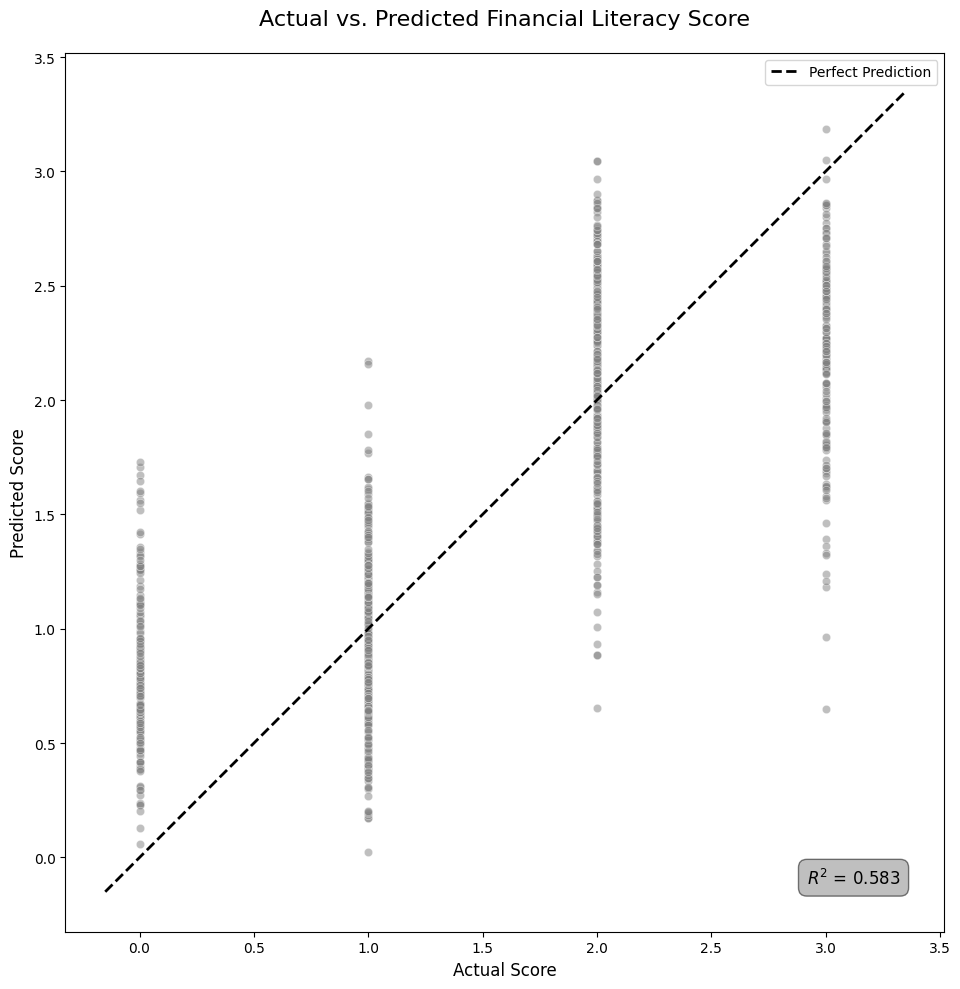

In [2588]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x=Y, y=Y_pred, alpha=0.5, color = 'grey')

# Add the ideal diagonal line 
# Find the limits to draw the line across the whole plot
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, color='black', linestyle='--', linewidth=2, label='Perfect Prediction')

ax.set_title('Actual vs. Predicted Financial Literacy Score', fontsize=16, pad=20)
ax.set_xlabel('Actual Score', fontsize=12)
ax.set_ylabel('Predicted Score', fontsize=12)
ax.legend()
ax.set_aspect('equal', adjustable='box')

# Format the R-squared value nicely
r2_text = f"$R^2$ = {r_squared:.3f}"

# Add the text to the plot
plt.text(0.95, 0.05, r2_text,
         transform=ax.transAxes,
         horizontalalignment='right',
         verticalalignment='bottom', # Align text box bottom with coordinate
         fontsize=12,
         bbox=dict(boxstyle='round,pad=0.5', fc='grey', alpha=0.5))

plt.tight_layout()
plt.savefig('../figures/plot_actual_vs_predicted.png')

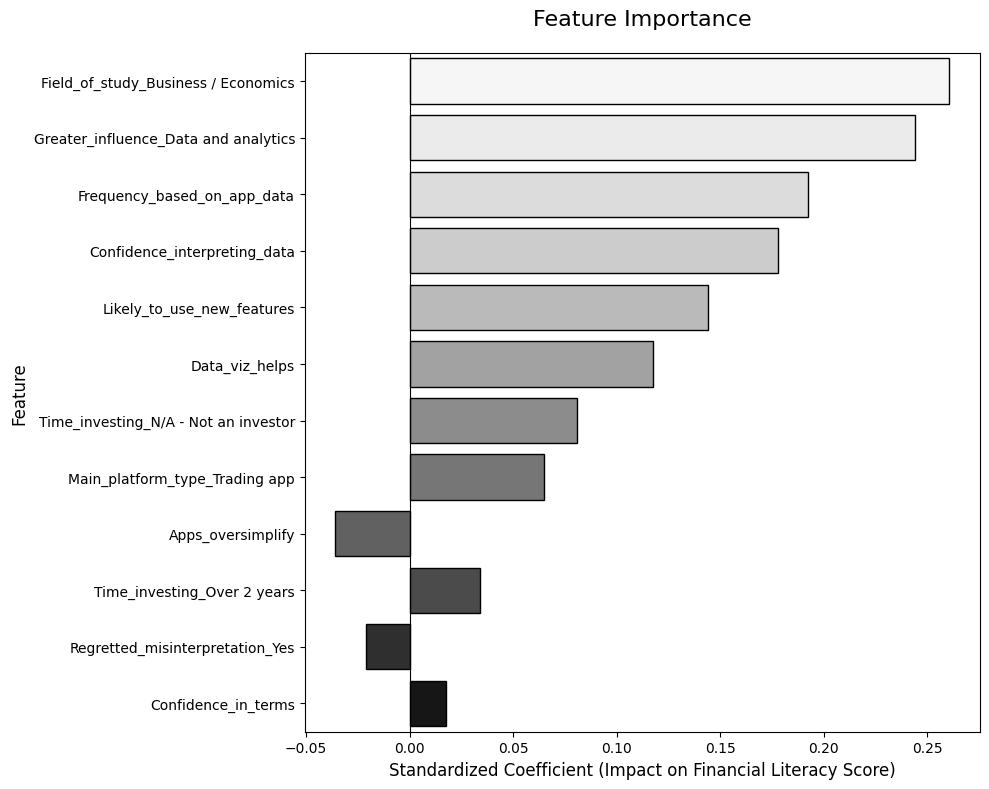

In [2589]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=sorted_coefs.values, 
                 y=sorted_coefs.index, 
                 palette='Greys',
                 edgecolor='black'
                 )
    
ax.set_title('Feature Importance', fontsize=16, pad=20)
ax.set_xlabel('Standardized Coefficient (Impact on Financial Literacy Score)', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
ax.axvline(0, color='black', linewidth=0.8) 
    
plt.tight_layout()
plt.savefig('../figures/plot_feature_importance.png')